# **Objective**
## To analyze the Historical Trader Data from Hyperliquid
---

## **Importing Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## **Loading the Dataset**

In [3]:
df2 = pd.read_csv(r"D:\Internship_Tasks\Trader_Market_Relationship\Datasets\historical_data - historical_data.csv")
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## **Exploratory Data Analysis**

In [5]:
print(f"Shape of the dataset: {df2.shape}")

Shape of the dataset: (211224, 16)


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

### **Insights**
- No null values present in the dataset which is a good thing.
- Four kinds of data types to deal with: Object, Float, Boolean, Integer
---

In [4]:
num_col = ["Execution Price", "Size Tokens", "Size USD", "Start Position", "Closed PnL", "Fee"]

num_df = df2[num_col]
num_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593


### **Insights**
**Execution Price**
- mean >> median(50%) which suggests extreme positive outliers (some coins/tokens have extremely high prices).
- min = 0.000005 suggests some tokens with tiny unit prices.
- Price scales vary hugely across coins.

**Size Tokens**
- mean = 4,623, 50% = 32 -> most trades are small token-count, but a few trades involve millions of tokens (max ≈ 15,822,440).
- Must be very skewed.

**Size USD**
- mean = 5,639, median = 597 -> again heavy tail. Many small-dollar trades and some very large trades (max ≈ 3.9M USD).
- min = 0.0 -> zero-dollar trades exist (maybe an error)

**Start Position**
- It has values ranging between huge min/max min (-14,334,630 to 30,509,480)

**Closed PnL**
- Highly Skewed PnL -> mean = 48.75, median = 0.0, 75% = 5.79, max = 135,329 -> this suggests that most of the trades have returned zero profits.

**Fee**
- Highly Skewed Fee -> mean = 1.16, median = 0.0896, min = -1.1757, max = 837.47 -> mostly tiny fees, some huge fees, and a negative fee (maybe an error).
---

In [9]:
print("Any duplicate rows: ", df2.duplicated().any())

Any duplicate rows:  False


### **Insights**
- No duplicate rows exist which is a good thing as it suggests there is no redundancy in the dataset
---

In [91]:
categorical_cols = [col for col in df2.select_dtypes(include="object").columns]

print("Number of unique values in each categorical column:")
df2[categorical_cols].nunique()

Number of unique values in each categorical column:


Account                 32
Coin                   246
Side                     2
Timestamp IST        27977
Direction               12
Transaction Hash    101184
dtype: int64

###  **Insights**
- The dataset contains details about 32 traders as there are 32 unique accounts.
- The dataset contains trades for 246 cryptocurrencies.
- There are ~27.9k trades recorded at unique timestamps.
- Transaction Hash has so many unique values which suggests that we should drop this as it would not provide any analytical value for trading patterns
---

In [77]:
df2['Direction'].value_counts()

Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

### **Insights**
- Most of the activity is people opening and closing long or short trades, while normal buy/sell trades are fewer, and rare events like liquidation or settlement almost never happen.
---

In [78]:
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], errors='coerce')
print("Min Date:", df2['Timestamp IST'].min())
print("Max Date:", df2['Timestamp IST'].max())

Min Date: 2023-01-05 01:06:00
Max Date: 2025-12-04 23:55:00


## **Data Visualization**

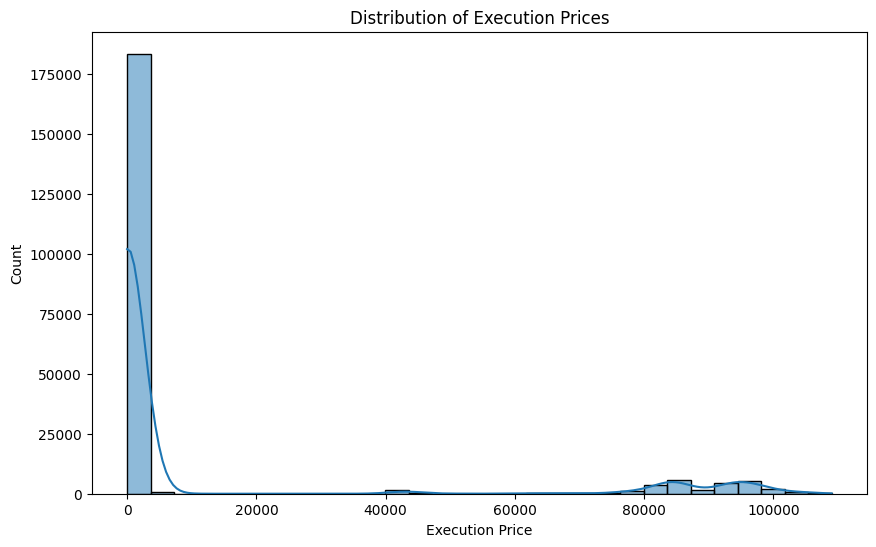

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(data=df2, x='Execution Price', kde=True, bins=30)
plt.title("Distribution of Execution Prices")
plt.show()

### **Insights**
- Highly Right-Skewed Distribution: The vast majority of trades occur at very low execution prices (close to 0), with the count dropping dramatically as prices increase
- There's an enormous spike in the leftmost bin, with approximately 175,000+ trades executing at prices near zero, this suggests that many trades involve very low-value cryptocurrencies.
- Sparse High-Value Trading: The small bars visible around 80,000-100,000 price range indicate that high-value trades do occur, but they're relatively rare.
---

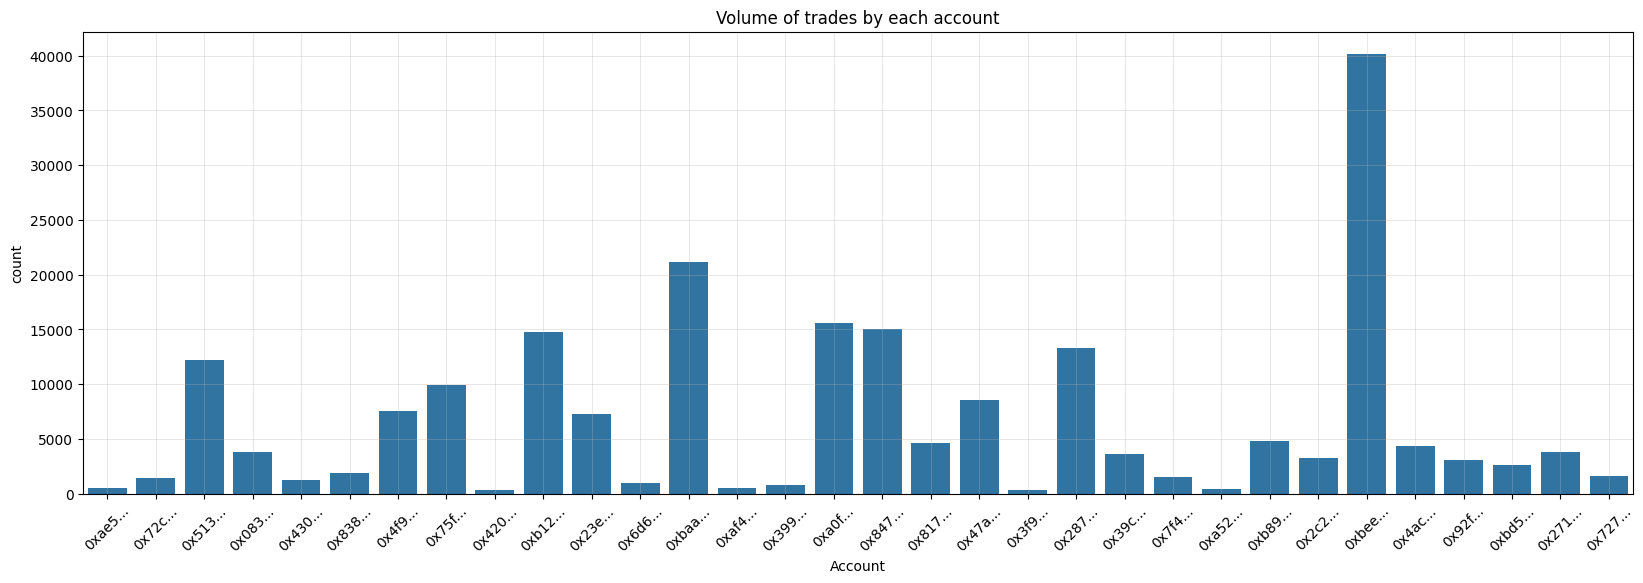

In [119]:
plt.figure(figsize=(20,6))
sns.countplot(data=df2, x='Account')
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.7)
truncated_labels = [addr[:5] + '...' for addr in df2["Account"].unique()]
plt.xticks(range(len(truncated_labels)), truncated_labels, rotation=45)
plt.title("Volume of trades by each account")
plt.show()

### **Insights**
- There is just one trader (0xb8...) with very high number of trades, about 40,000.
- 6 traders (0x51..., 0xb1..., 0xba..., 0xa0..., 0x84..., 0x28...) have number of trades in the range 10,000-20,000.
- The remaining 25 traders out of 32 have number of trades less than 10,000.
---

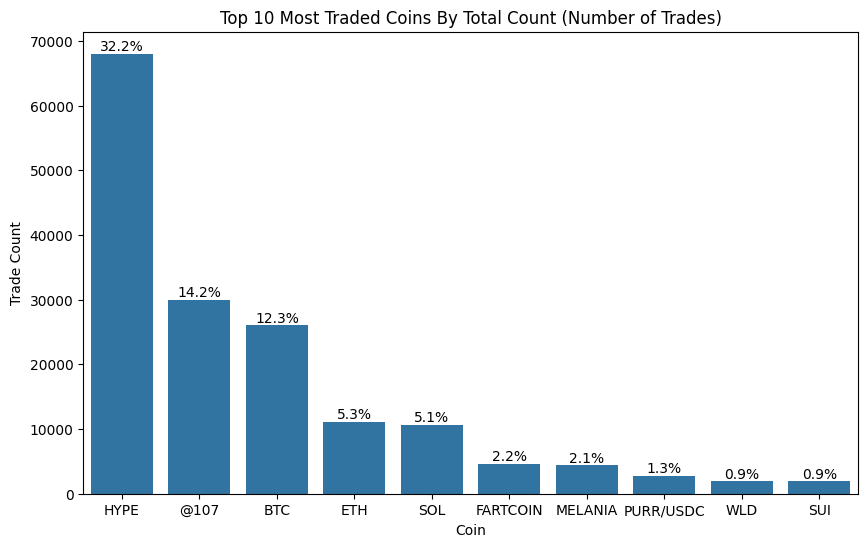

In [118]:
# Count trades per coin
coin_counts = df2['Coin'].value_counts()

# Convert to percentage
coin_percent = (coin_counts / coin_counts.sum()) * 100

# Combine counts + percentage into a DataFrame
coin_stats = pd.DataFrame({'Count': coin_counts, 'Percentage': coin_percent})

# Pick top 10 coins
top_coins = coin_stats.head(10).reset_index()
top_coins.columns = ['Coin', 'Count', 'Percentage']

# Plot countplot
plt.figure(figsize=(10,6))
sns.barplot(x="Coin", y="Count", data=top_coins)

# Add percentages on top of bars
for i, row in top_coins.iterrows():
    plt.text(i, row['Count'], f"{row['Percentage']:.1f}%", ha='center', va='bottom')

plt.title("Top 10 Most Traded Coins By Total Count (Number of Trades)")
plt.ylabel("Trade Count")
plt.show()

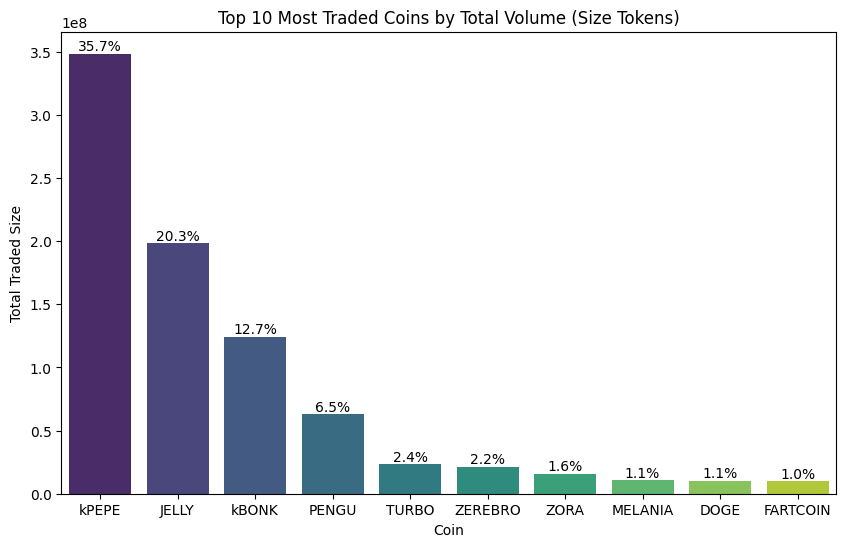

In [117]:
# Aggregate total traded size per coin
coin_volume = df2.groupby('Coin')['Size Tokens'].sum().sort_values(ascending=False)

# Convert to percentage
coin_percent = (coin_volume / coin_volume.sum()) * 100

# Combine volume + percentage into a DataFrame
coin_stats = pd.DataFrame({'TotalSize': coin_volume, 'Percentage': coin_percent})

# Pick top 10 coins
top_coins = coin_stats.head(10).reset_index()
top_coins.columns = ['Coin', 'TotalSize', 'Percentage']

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Coin", y="TotalSize", data=top_coins, hue='Coin', legend=False, palette="viridis")

# Add percentages on top of bars
for i, row in top_coins.iterrows():
    plt.text(i, row['TotalSize'], f"{row['Percentage']:.1f}%", ha='center', va='bottom')

plt.title("Top 10 Most Traded Coins by Total Volume (Size Tokens)")
plt.ylabel("Total Traded Size")
plt.show()

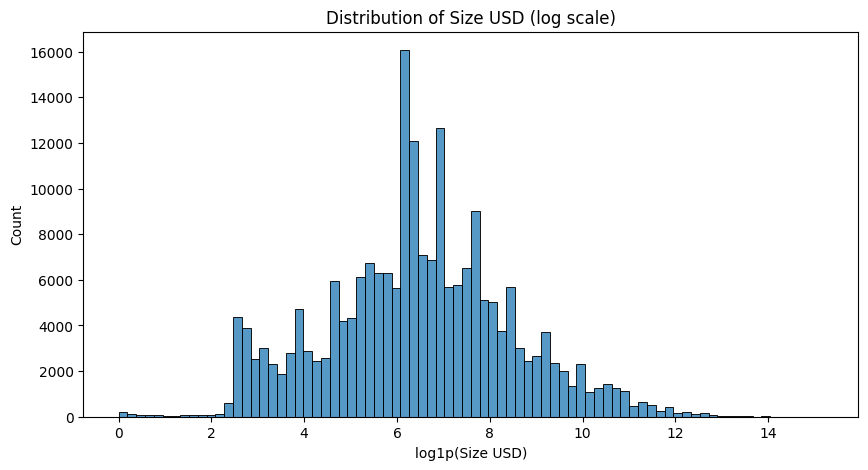

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df2['Size USD']), bins=80)
plt.xlabel('log1p(Size USD)')
plt.title('Distribution of Size USD (log scale)')
plt.show()

### **Insights**
- log1p = log(1 + x) 
- log10 = 0 -> $1 (10^0)
- log10 = 2 -> $100 (10^2)
- log10 = 4 -> $10,000 (10^4)
- log10 = 6 -> $1,000,000 (10^6)
- log10 = 8 -> $100,000,000 (10^8)
---
- The highest frequency occurs around $1 million transactions ->  log10 = 6
- Long tail: Few very large transactions (>$100M) and very small ones (<$100)
- Range: Transactions span from roughly $1 to $1 trillion
---

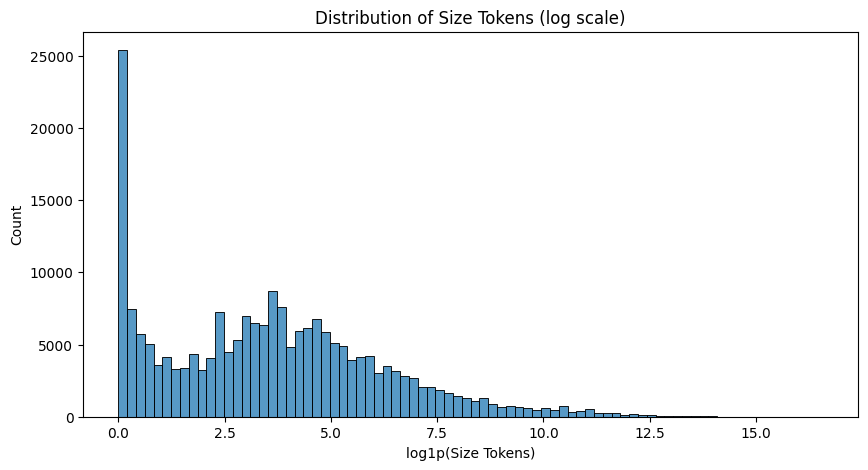

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df2['Size Tokens']), bins=80)
plt.xlabel('log1p(Size Tokens)')
plt.title('Distribution of Size Tokens (log scale)')
plt.show()

### **Insights**
- Extreme left skew: Massive spike around log10 = 0 (i.e. 1 token) with ~25,000 transactions
- Rapid decay: Sharp drop-off after the initial peak, suggesting most trades are very small
- Secondary mode: Smaller peak around log10 = 3-4 (1,000-10,000 tokens)
- Long tail: Few large trades extending to log10 = 12.5+ (trillions of tokens)
---

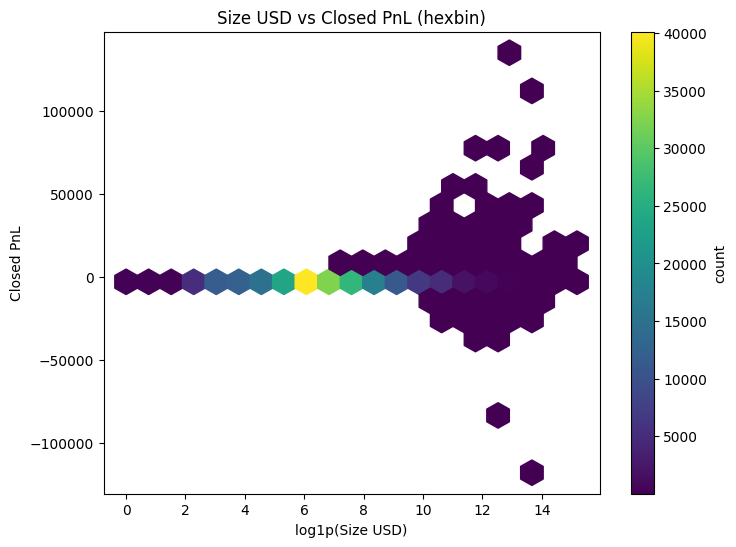

In [84]:
plt.figure(figsize=(8,6))
plt.hexbin(np.log1p(df2['Size USD']), df2['Closed PnL'], gridsize=20, mincnt=1)
plt.xlabel('log1p(Size USD)')
plt.ylabel('Closed PnL')
plt.title('Size USD vs Closed PnL (hexbin)')
plt.colorbar(label='count')
plt.show()

### **Insights**
- Most transactions result in minimal profits or losses.
- Roughly equal density of profitable and losing trades around the zero line.
- Large transactions (high log10 values) show wide P&L spreads, with both significant gains and losses.
- Zero or near-zero P&L across all transaction sizes.
---

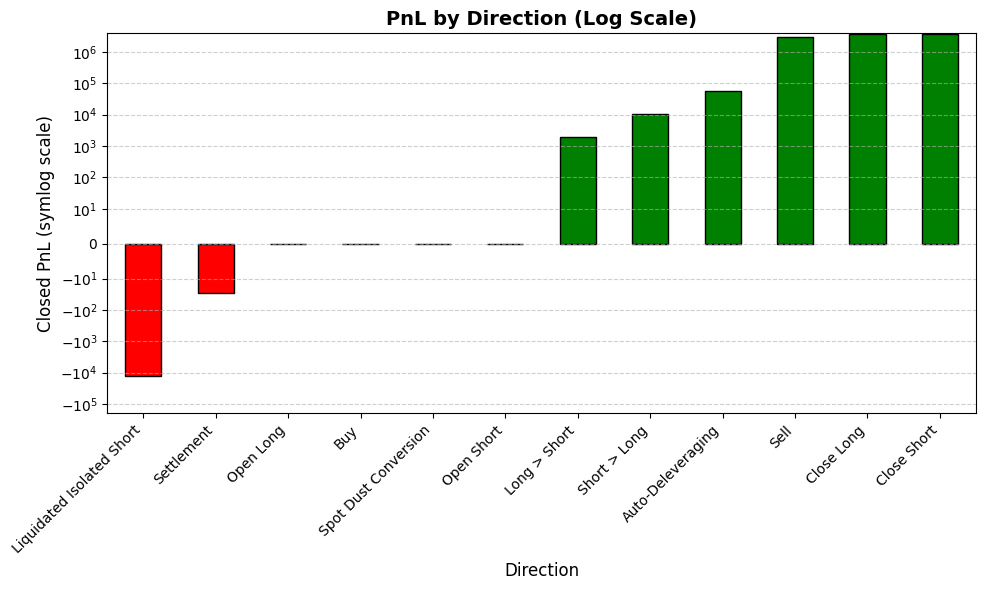

In [114]:
plt.figure(figsize=(10,6))

pnl_by_direction = df2.groupby("Direction")["Closed PnL"].sum().sort_values()

# Color bars based on sign
colors = ["green" if val > 0 else "red" for val in pnl_by_direction]

# Plot bar chart
pnl_by_direction.plot(
    kind="bar", 
    color=colors, 
    edgecolor="black"
)

# Apply symmetric log scale
plt.yscale("symlog", linthresh=10)

# Labels and title
plt.ylabel("Closed PnL (symlog scale)", fontsize=12)
plt.xlabel("Direction", fontsize=12)
plt.title("PnL by Direction (Log Scale)", fontsize=14, weight="bold")

# Improve layout
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


### **Insights**
- Green bars for profit: Close Short > Close Long > Sell > Auto-Deleveraging > (Short>Long) > (Long>Short) 
- Red bars for loss: Liquidated Isolated Short > Settlement
- Zero PnL: Open Long, Buy, Spot Dust Conversion, Open Short
---

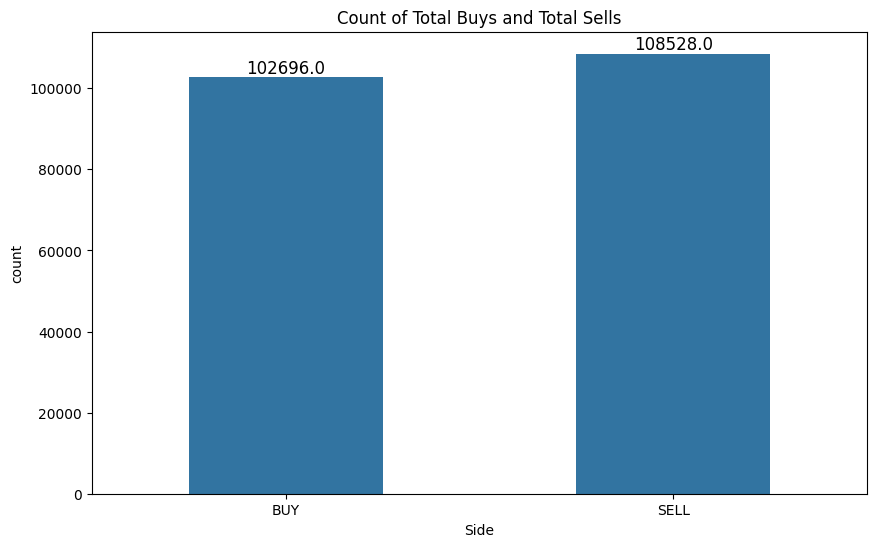

In [107]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df2, x="Side", width=0.5)  # width < 1 makes bars narrower

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",                   # text = height (count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # x,y position
        ha='center', va='bottom', fontsize=12, color='black'
    )

plt.title("Count of Total Buys and Total Sells")
plt.show()

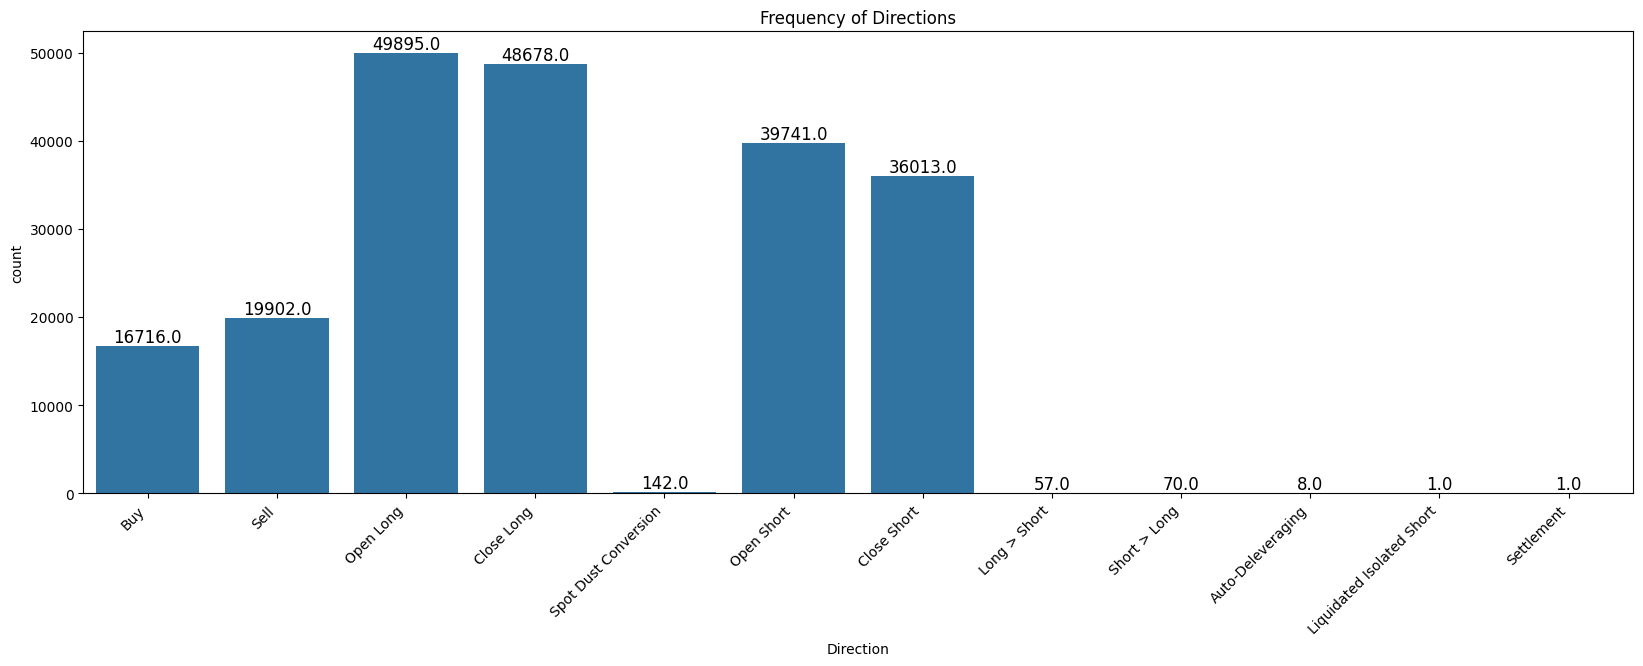

In [112]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data=df2, x="Direction")  # width < 1 makes bars narrower

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",                   # text = height (count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # x,y position
        ha='center', va='bottom', fontsize=12, color='black'
    )

plt.title("Frequency of Directions")
plt.xticks(rotation=45, ha="right")
plt.show()

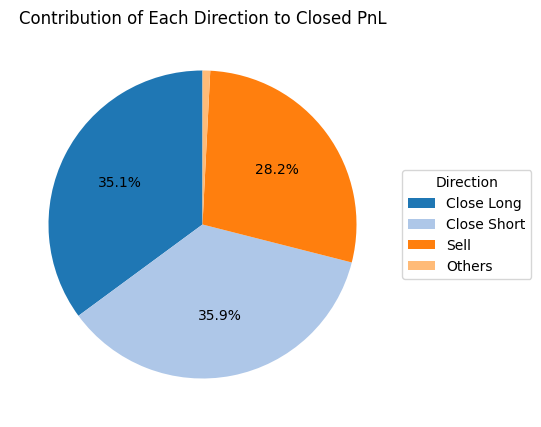

In [113]:
# Group by Direction and sum PnL
pnl_by_direction = df2.groupby("Direction")["Closed PnL"].sum().reset_index()

# Compute percentage contribution
pnl_by_direction["Pct"] = (
    pnl_by_direction["Closed PnL"].abs() / pnl_by_direction["Closed PnL"].abs().sum() * 100
)

# Threshold for grouping
threshold = 1.0  # % cutoff
small = pnl_by_direction[pnl_by_direction["Pct"] < threshold]
large = pnl_by_direction[pnl_by_direction["Pct"] >= threshold]

# Add "Others" category
if not small.empty:
    others_row = pd.DataFrame({
        "Direction": ["Others"],
        "Total PnL": [small["Closed PnL"].sum()],
        "Pct": [small["Pct"].sum()]
    })
    pnl_plot = pd.concat([large, others_row], ignore_index=True)
else:
    pnl_plot = pnl_by_direction

# Plot pie chart
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    pnl_plot["Pct"],
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",  # hide 0% labels
    startangle=90,
    colors=plt.cm.tab20.colors
)

plt.legend(
    wedges,
    pnl_plot["Direction"],
    title="Direction",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Contribution of Each Direction to Closed PnL")
plt.show()

### **Insights**
- The above pie chart shows the money-wise contribution of each direction to Closed PnL in absolute terms, which hides the sign (profit vs loss).
- It simply shows which directions move the most money.
- The 3 directions - Closed Short, Closed Long and Sell are the directions which move the most money
---

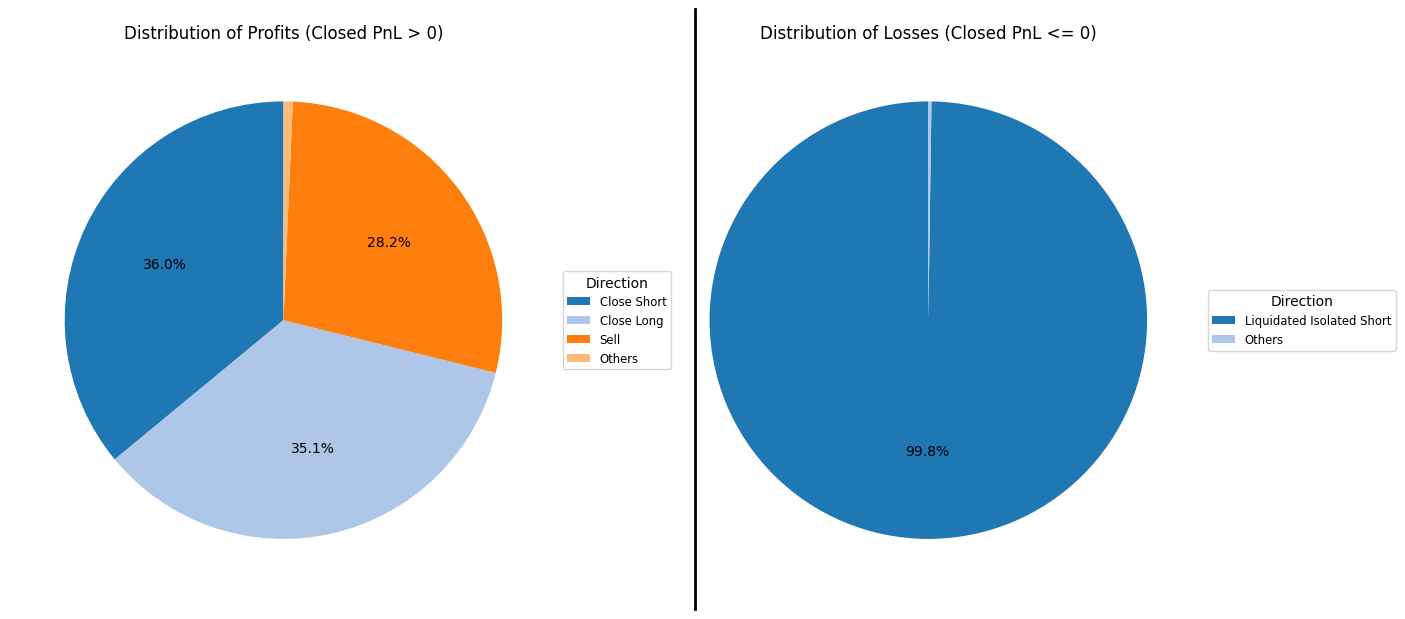

In [86]:
# --- 1) Lightweight pre-check + clean ---
# Only keep needed columns, coerce Closed PnL to numeric, drop rows with no Direction
df_small = df2.loc[:, ["Direction", "Closed PnL"]].dropna(subset=["Direction"])
df_small["Closed PnL"] = pd.to_numeric(df_small["Closed PnL"], errors="coerce").fillna(0.0)

# Make Direction a categorical (speeds up groupby for many rows)
df_small["Direction"] = df_small["Direction"].astype("category")

# --- 2) Group once (fast) ---
pnl_by_direction = df_small.groupby("Direction", observed=True, as_index=False)["Closed PnL"].sum()


# Helper to prepare plot DataFrame for profits or losses
def prepare_plot_df(base_df, sign="profit", threshold=1.0, max_slices=20):
    if sign == "profit":
        d = base_df[base_df["Closed PnL"] > 0].copy()
        if d.empty: 
            return None
        d["Pct"] = d["Closed PnL"] / d["Closed PnL"].sum() * 100
    else:
        d = base_df[base_df["Closed PnL"] < 0].copy()
        if d.empty:
            return None
        d["Pct"] = d["Closed PnL"].abs() / d["Closed PnL"].abs().sum() * 100

    # Sort descending by contribution
    d = d.sort_values("Pct", ascending=False).reset_index(drop=True)

    # If too many tiny slices, keep top (max_slices-1) and group rest into Others
    if len(d) > max_slices:
        top = d.iloc[: max_slices - 1].copy()
        others = pd.DataFrame({
            "Direction": ["Others"],
            "Closed PnL": [d["Closed PnL"].iloc[max_slices - 1 :].sum()],
            "Pct": [d["Pct"].iloc[max_slices - 1 :].sum()]
        })
        plot_df = pd.concat([top, others], ignore_index=True)
        return plot_df

    # Otherwise use threshold grouping (<threshold% -> Others)
    small = d[d["Pct"] < threshold]
    large = d[d["Pct"] >= threshold].copy()
    if not small.empty:
        others_row = pd.DataFrame({
            "Direction": ["Others"],
            "Closed PnL": [small["Closed PnL"].sum()],
            "Pct": [small["Pct"].sum()]
        })
        plot_df = pd.concat([large, others_row], ignore_index=True)
    else:
        plot_df = large

    # final sort
    plot_df = plot_df.sort_values("Pct", ascending=False).reset_index(drop=True)
    return plot_df

# Prepare both profit and loss slices
profits_plot = prepare_plot_df(pnl_by_direction, sign="profit", threshold=1.0, max_slices=20)
losses_plot  = prepare_plot_df(pnl_by_direction, sign="loss",  threshold=1.0, max_slices=20)


# --- 3) Plot side-by-side pies with safe color length, and handle empty sides gracefully ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# plotting function
def safe_pie(ax, plot_df, title):
    if plot_df is None or plot_df["Pct"].sum() == 0:
        ax.text(0.5, 0.5, "No data to plot", ha="center", va="center", fontsize=12)
        ax.set_axis_off()
        return
    colors = plt.cm.tab20.colors[: len(plot_df)]  # take only needed colors
    wedges, _, autotexts = ax.pie(
        plot_df["Pct"],
        labels=None,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",  # hide very small labels
        startangle=90,
        colors=colors,
        wedgeprops=dict(linewidth=0.5)
    )
    ax.set_title(title)
    ax.legend(
        wedges,
        plot_df["Direction"],
        title="Direction",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize="small"
    )

safe_pie(axes[0], profits_plot, "Distribution of Profits (Closed PnL > 0)")
safe_pie(axes[1], losses_plot,  "Distribution of Losses (Closed PnL <= 0)")

fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color="black", linewidth=2))

plt.tight_layout()
plt.show()


### **Insights**
- These pie charts show the money-wise contribution of each direction in making profits and losses.
- So in profit making side, we have 3 strong directions: Close Short, Close Long and Sell.
- In loss making side, we have just 1 dominating direction: Liquidated Isolated Short.
---

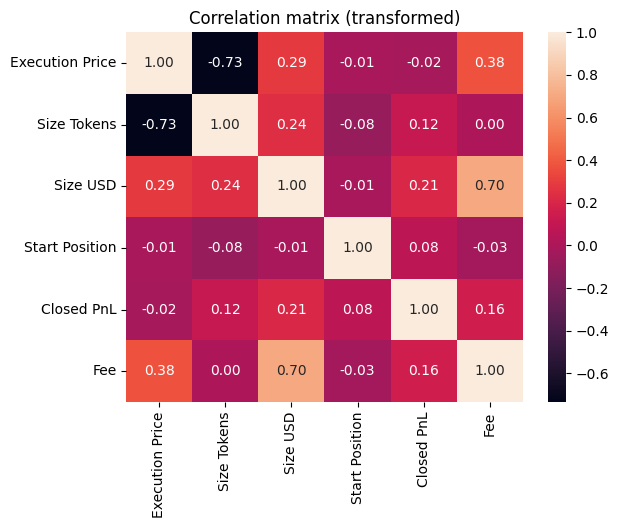

In [88]:
num = df2[['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee']].copy()
num = np.log1p(num.abs()) * np.sign(num)  # preserve sign but compress scale (careful)
sns.heatmap(num.corr(), annot=True, fmt=".2f")
plt.title('Correlation matrix (transformed)')
plt.show()

### **Insights**
**Strong Relationships**
- Execution Price <-> Size Tokens: Strong negative correlation (-0.73) - as token size increases, execution price decreases
- Size USD <-> Fee: Strong positive correlation (0.70) - larger USD transactions incur proportionally higher fees, indicating fee structure scales with transaction value

**Moderate Relationships**
- Execution Price <-> Fee: Moderate positive correlation (0.38) - higher execution prices associated with higher fees

**Weak Relationships**
- Execution Price <-> Size USD: Weak positive correlation (0.29) 
- Size Tokens <-> Size USD: Weak positive correlation (0.24) 
- Closed P&L <-> Size USD: Weak positive correlation (0.21) - slightly higher profits on larger USD trades
---